- https://medium.com/@vanillaxiangshuyang/self-supervised-learning-on-tabular-data-with-tabnet-544b3ec85cee
- https://colab.research.google.com/drive/1P8Obe07DP3VeOld08ThyT1HnChLip_LO#scrollTo=gvy9vUUNOP0W

- https://www.kaggle.com/code/sisharaneranjana/semi-supervised-pre-training-with-tabnet#%F0%9F%94%8FDescription-of-the-dataset-
- https://dacon.io/en/codeshare/3837

In [1]:
import pandas as pd
import numpy as np
import pickle

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

# 전처리 된 데이터 불러오기

In [2]:
with open("./dataset/creditcard.pkl","rb") as file:
    data = pickle.load(file)

In [3]:
df = data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# 데이터 전처리
# Time 을 일중 시간으로 변환
df.loc[:, "Time"] = df.loc[:, "Time"].apply(lambda x : x / 3600 % 24)

# Amount column 은 편차가 크므로 log-scale 로 변환
eps=0.001
df['Amount'] = np.log(df.pop('Amount') + eps)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


# train_test_split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
features = df.values
labels = np.array(df.pop('Class'))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=0, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

print("X train shape: ", X_train.shape)
print("Y train shape: ", y_train.shape)
print("===============")
print("X validation shape: ", X_val.shape)
print("y validation shape: ", y_val.shape)
print("===============")
print("X test shape: ", X_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (71201, 31)
Y train shape:  (71201,)
X validation shape:  (71202, 31)
y validation shape:  (71202,)
X test shape:  (142404, 31)
Y test shape:  (142404,)


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val= sc.transform(X_val)

# Network parameters

- https://github.com/dreamquark-ai/tabnet
- https://github.com/dreamquark-ai/tabnet/blob/develop/pretraining_example.ipynb

In [9]:
import torch
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetClassifier

In [10]:
# TabNetPretrainer
unsupervised_model = TabNetPretrainer(
#     cat_idxs=cat_idxs,
#     cat_dims=cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax",
    n_shared_decoder=1, # nb shared glu for decoding
    n_indep_decoder=1, # nb independent glu for decoding
#     grouped_features=[[0, 1]], # you can group features together here
    verbose=5,
)

# Self Supervised Training

In [11]:
max_epochs = 100

In [12]:
unsupervised_model.fit(
    X_train=X_train,
    eval_set=[X_val],
    max_epochs=max_epochs , patience=5,
    batch_size=2048, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.5,
)

epoch 0  | loss: 1.5683  | val_0_unsup_loss_numpy: 1.0174200534820557|  0:00:10s
epoch 5  | loss: 0.96061 | val_0_unsup_loss_numpy: 0.9588000178337097|  0:01:01s
epoch 10 | loss: 0.94933 | val_0_unsup_loss_numpy: 0.9368399977684021|  0:01:49s
epoch 15 | loss: 0.92067 | val_0_unsup_loss_numpy: 0.934249997138977|  0:02:36s

Early stopping occurred at epoch 17 with best_epoch = 12 and best_val_0_unsup_loss_numpy = 0.9095600247383118


In [13]:
# Make reconstruction from a dataset
reconstructed_X, embedded_X = unsupervised_model.predict(X_val)
assert(reconstructed_X.shape==embedded_X.shape)

In [14]:
unsupervised_explain_matrix, unsupervised_masks = unsupervised_model.explain(X_val)

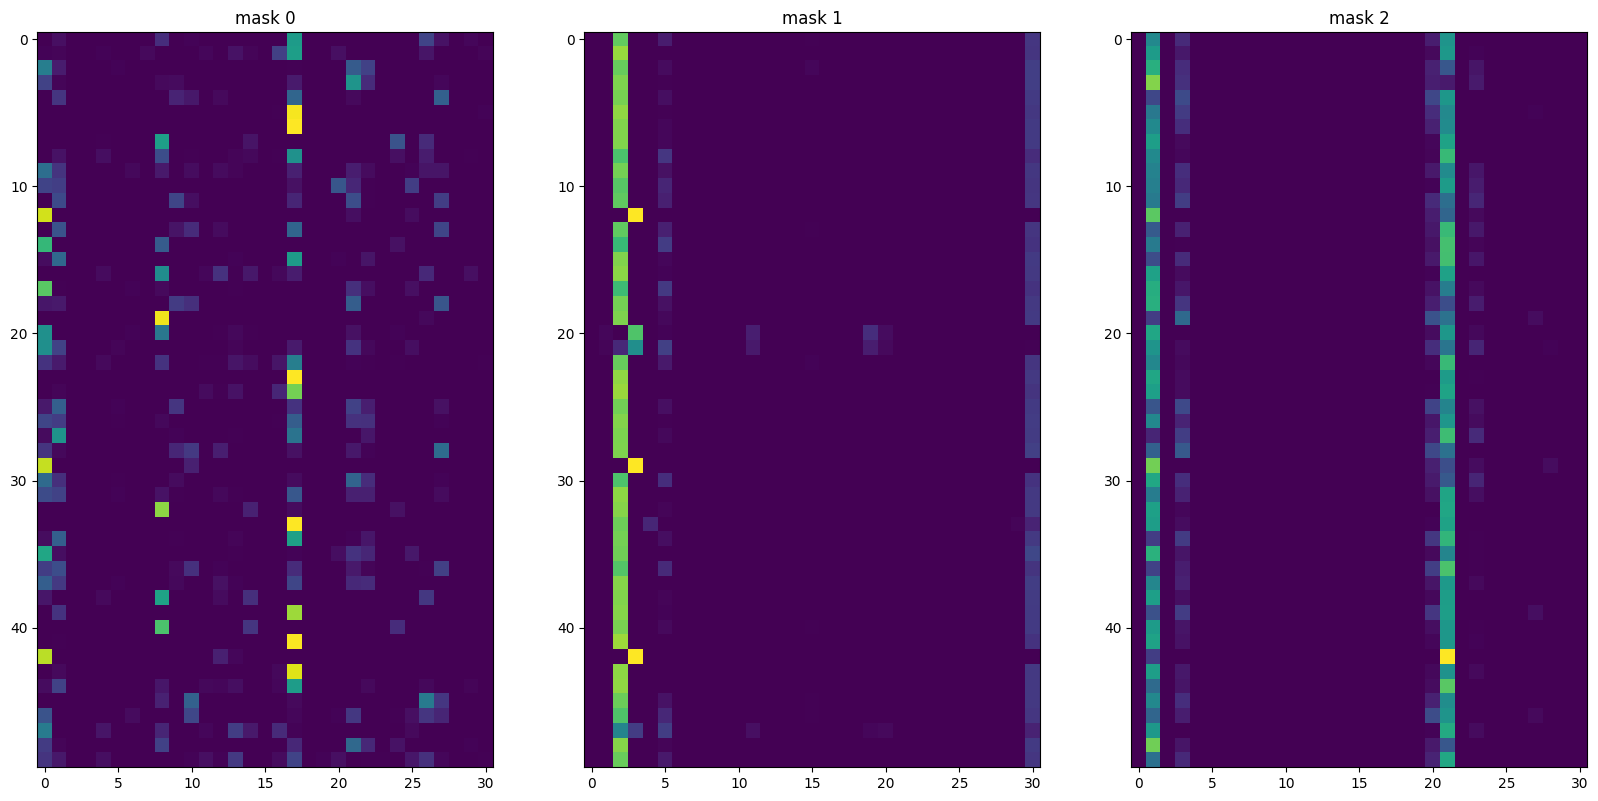

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(unsupervised_masks[i][:50])
    axs[i].set_title(f"mask {i}")

# Save and load the same way as other TabNet models

In [16]:
unsupervised_model.save_model('./test_pretrain')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain.zip')

Successfully saved model at ./test_pretrain.zip


# Training

In [17]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-3),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax', # This will be overwritten if using pretrain model
                       verbose=5,
                      )

In [18]:
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import f1_score

class F1_Score(Metric):
    def __init__(self):
        self._name = "f1"
        self._maximize = True

    def __call__(self, y_true, y_score):
        score = f1_score(y_true, (y_score[:, 1]>0.5)*1)
        return score

In [19]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain,
    
) 

epoch 0  | loss: 0.53528 | train_logloss: 0.51639 | train_f1: 0.01193 | valid_logloss: 0.52153 | valid_f1: 0.01118 |  0:00:11s
epoch 5  | loss: 0.00751 | train_logloss: 0.00662 | train_f1: 0.71733 | valid_logloss: 0.00895 | valid_f1: 0.69444 |  0:01:07s
epoch 10 | loss: 0.00223 | train_logloss: 0.00151 | train_f1: 0.94779 | valid_logloss: 0.00148 | valid_f1: 0.95094 |  0:02:13s
epoch 15 | loss: 0.00134 | train_logloss: 0.00123 | train_f1: 0.94779 | valid_logloss: 0.00124 | valid_f1: 0.95817 |  0:03:21s
epoch 20 | loss: 0.00137 | train_logloss: 0.00134 | train_f1: 0.94779 | valid_logloss: 0.00155 | valid_f1: 0.95522 |  0:04:30s
epoch 25 | loss: 0.00152 | train_logloss: 0.00082 | train_f1: 0.97119 | valid_logloss: 0.00084 | valid_f1: 0.96947 |  0:05:34s
epoch 30 | loss: 0.00116 | train_logloss: 0.00061 | train_f1: 0.97521 | valid_logloss: 0.00085 | valid_f1: 0.96947 |  0:06:41s
epoch 35 | loss: 0.00085 | train_logloss: 0.00057 | train_f1: 0.97925 | valid_logloss: 0.00079 | valid_f1: 0.96

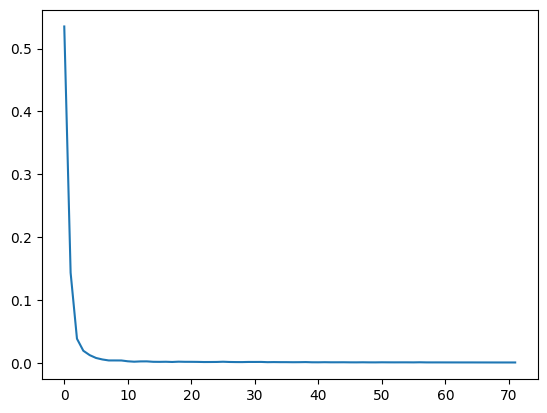

In [20]:
# plot losses
plt.plot(clf.history['loss'])

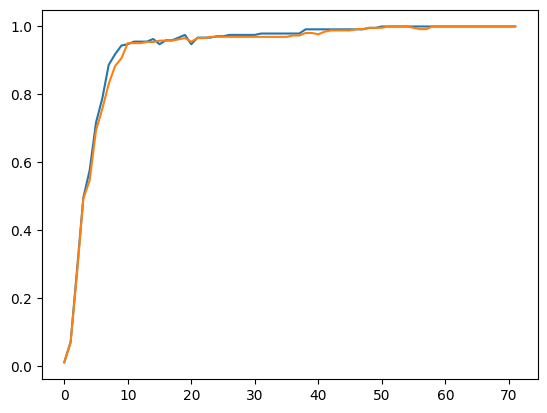

In [21]:
# plot auc
plt.plot(clf.history['train_f1'])
plt.plot(clf.history['valid_f1'])

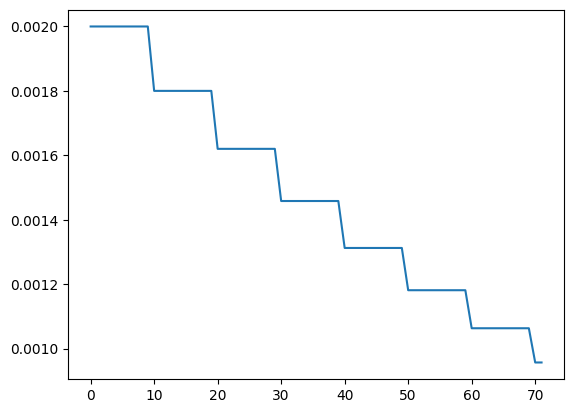

In [22]:
# plot learning rates
plt.plot(clf.history['lr'])

# Predictions

In [23]:
# preds = clf.predict_proba(X_test)
preds = clf.predict(X_test)
test_f1 = f1_score(preds, y_test)

preds_val = clf.predict(X_val)
valid_f1 = f1_score(preds_val, y_val)

print("BEST VALID SCORE : ", clf.best_cost)
print("FINAL TEST SCORE : ", test_f1)

BEST VALID SCORE :  1.0
FINAL TEST SCORE :  0.9979633401221996


In [24]:
# check that best weights are used
assert np.isclose(valid_f1, np.max(clf.history['valid_f1']), atol=1e-6)

# Save and load Model

In [25]:
# save tabnet model
saving_path_name = "./tabnet_model_test_1"
saved_filepath = clf.save_model(saving_path_name)

Successfully saved model at ./tabnet_model_test_1.zip


In [26]:
# define new model with basic parameters and load state dict weights
loaded_clf = TabNetClassifier()
loaded_clf.load_model(saved_filepath)

In [27]:
# loaded_preds = loaded_clf.predict_proba(X_test)
loaded_preds = loaded_clf.predict(X_test)
loaded_test_f1 = f1_score(loaded_preds, y_test)

print("FINAL TEST SCORE : ",loaded_test_f1)

FINAL TEST SCORE :  0.9979633401221996


In [28]:
assert(test_f1 == loaded_test_f1)

# Global explainability : feat importance summing to 

In [29]:
clf.feature_importances_

array([1.06525975e-01, 1.92619965e-02, 1.00936878e-01, 1.09808242e-01,
       1.03591052e-04, 1.06193237e-02, 2.99248368e-07, 5.20073848e-08,
       1.65691474e-03, 5.29382167e-05, 1.91007507e-01, 5.35952000e-02,
       9.07151486e-05, 6.60293777e-05, 2.23985508e-06, 3.75511643e-04,
       1.81986326e-05, 1.23253996e-03, 5.07835029e-02, 2.96684760e-07,
       6.48213287e-04, 3.26516576e-01, 2.27761794e-03, 2.99946791e-04,
       7.70701546e-05, 1.02929473e-02, 1.69993225e-04, 7.58674495e-03,
       1.10406136e-04, 5.55277925e-03, 3.29753010e-04])

# Local explainability and masks

In [30]:
explain_matrix, masks = clf.explain(X_test)

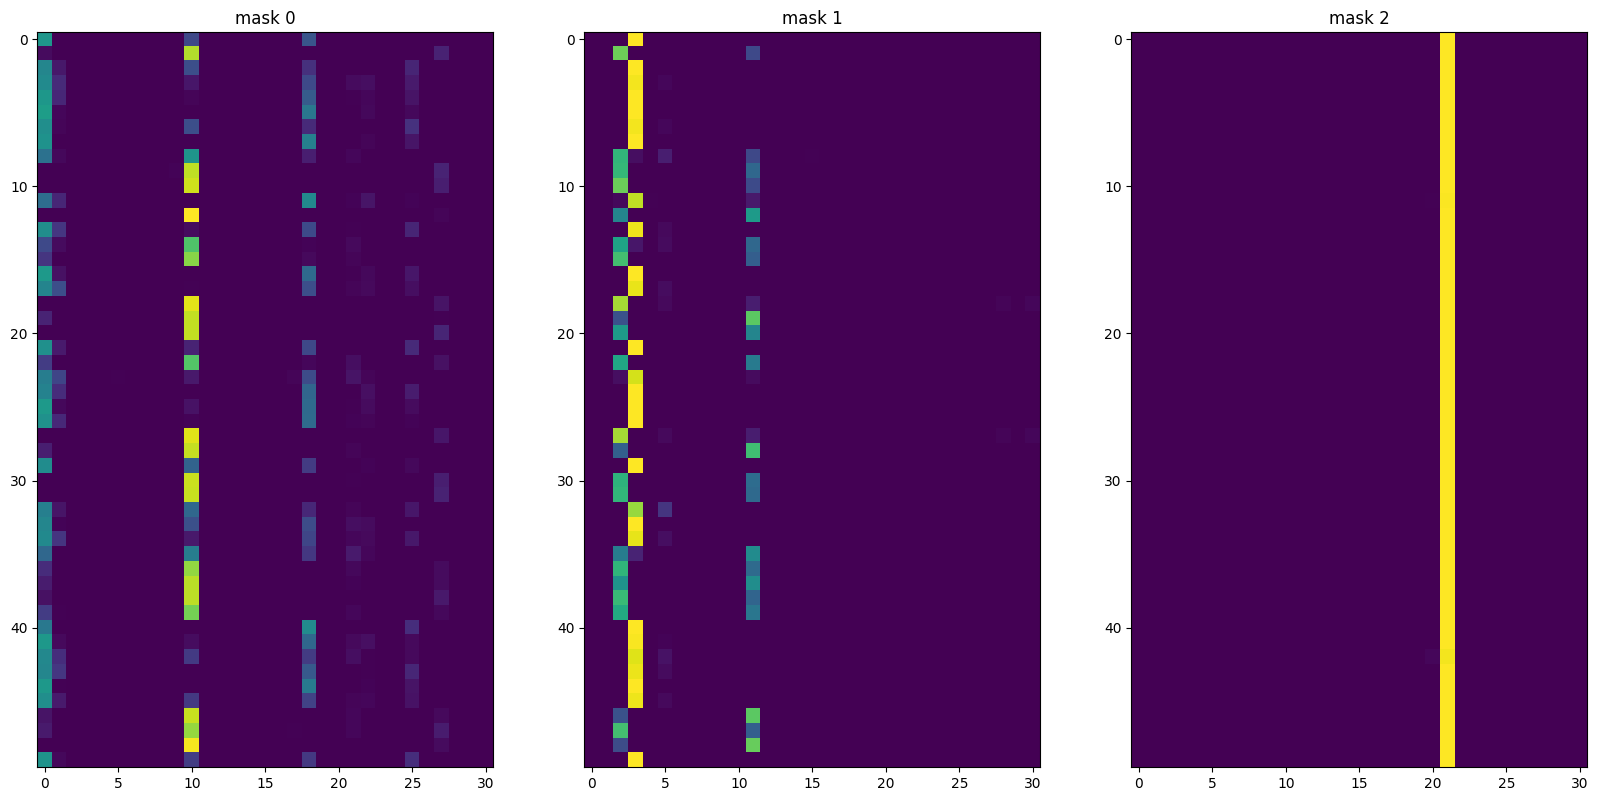

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

# Pre-trained 된 모델로 test
- ctgan_generated로 test

In [32]:
generated = pd.read_csv("./dataset/generated/data5.csv")
generated.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
# 데이터 전처리
ctgan = generated.copy()

# Time 을 일중 시간으로 변환
ctgan.loc[:, "Time"] = ctgan.loc[:, "Time"].apply(lambda x : x / 3600 % 24)

# Amount column 은 편차가 크므로 log-scale 로 변환
eps=0.001
ctgan['Amount'] = np.log(ctgan.pop('Amount') + eps)

ctgan.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


In [34]:
ctgan_features = ctgan.values
ctgan_labels = np.array(ctgan.pop('Class'))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(ctgan_features, ctgan_labels, test_size=0.5, random_state=0, stratify=ctgan_labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

In [36]:
clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax' # This will be overwritten if using pretrain model
)

In [37]:
clf.fit(X_train,y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1'],
)

epoch 0  | loss: 0.09261 | train_logloss: 0.02249 | train_f1: 0.41065 | valid_logloss: 0.02584 | valid_f1: 0.36786 |  0:00:13s
epoch 1  | loss: 0.01667 | train_logloss: 0.01345 | train_f1: 0.61961 | valid_logloss: 0.015   | valid_f1: 0.63398 |  0:00:26s
epoch 2  | loss: 0.01322 | train_logloss: 0.01301 | train_f1: 0.64855 | valid_logloss: 0.01399 | valid_f1: 0.68099 |  0:00:39s
epoch 3  | loss: 0.01208 | train_logloss: 0.00948 | train_f1: 0.72964 | valid_logloss: 0.01024 | valid_f1: 0.73512 |  0:00:52s
epoch 4  | loss: 0.00906 | train_logloss: 0.009   | train_f1: 0.77453 | valid_logloss: 0.0094  | valid_f1: 0.7837  |  0:01:05s
epoch 5  | loss: 0.01037 | train_logloss: 0.01019 | train_f1: 0.69149 | valid_logloss: 0.01055 | valid_f1: 0.69453 |  0:01:18s
epoch 6  | loss: 0.00667 | train_logloss: 0.00465 | train_f1: 0.87284 | valid_logloss: 0.00503 | valid_f1: 0.87482 |  0:01:30s
epoch 7  | loss: 0.0042  | train_logloss: 0.00665 | train_f1: 0.57557 | valid_logloss: 0.00661 | valid_f1: 0.56

In [38]:
predicted_test=clf.predict(X_test)
score=f1_score(y_test,predicted_test)
print(score)

0.8800588668138337


- ctgan_generated : 0.3146067415730337
- ctgan_generated_0320 / test_size = 0.3 : 0.15686274509803924
- ctgan_generated_0320 / test_size = 0.5 : 0.15625